/var/folders/dr/6j37tcfd6lg9zbmw4fsj75nr0000gn/T/ipykernel_45847/3162375466.py:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_index = pd.date_range(start=df_clean.index.min(), end=df_clean.index.max(), freq='H')


缺失值数量: 3631 / 55176
缺失率: 6.58%


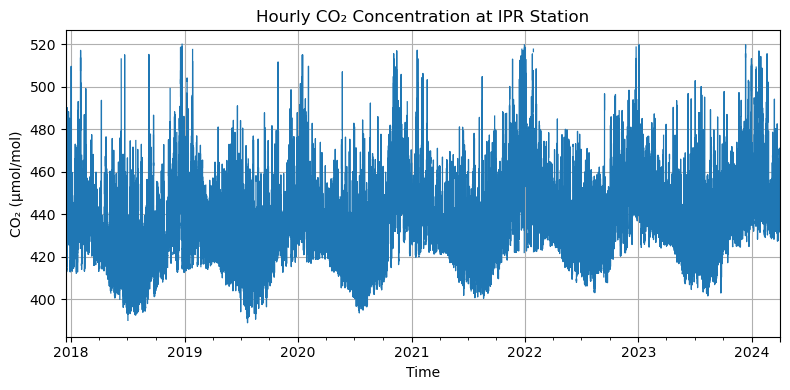

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 读取数据（跳过文件前45行注释）
file_path = 'ICOS_ATC_L2_L2-2024.1_IPR_40.0_CTS.txt'
df = pd.read_csv(file_path, sep=';', skiprows=44)

# 2. 构建时间戳列
df['datetime'] = pd.to_datetime(dict(
    year=df.Year, month=df.Month, day=df.Day, hour=df.Hour
))

# 3. 按时间排序并设置为索引
df = df.sort_values('datetime').set_index('datetime')

# 4. 筛选有效数据（CO2 ≠ -999.99 且 Flag 为 'O'）
df = df[(df['co2'] != -999.99) & (df['Flag'].str.strip() == 'O')]

# 5. 保留关键列
df_clean = df[['co2', 'Stdev', 'NbPoints']].copy()


# ==== 缺失率计算部分 ====
# 生成完整的时间索引（以小时为频率）
full_index = pd.date_range(start=df_clean.index.min(), end=df_clean.index.max(), freq='H')

# 重新索引，缺失点会填 NaN
df_full = df_clean.reindex(full_index)

# 计算缺失比例
missing_count = df_full['co2'].isna().sum()
total_count = len(df_full)
missing_percent = missing_count / total_count * 100

print(f"缺失值数量: {missing_count} / {total_count}")
print(f"缺失率: {missing_percent:.2f}%")

df_full['co2'].plot(
    figsize=(8, 4),
    title='Hourly CO₂ Concentration at IPR Station',
    linewidth=0.9  # 默认大约是 1.5，可以调小
)
plt.ylabel('CO₂ (µmol/mol)')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()




In [2]:
df

,#Site,SamplingHeight,Year,Month,Day,Hour,Minute,DecimalDate,co2,Stdev,...,InstrumentId,QualityId,LTR,CMR,STTB,QcBias,QcBiasUncertainty,co2-WithoutSpikes,Stdev-WithoutSpikes,NbPoints-WithoutSpikes
datetime,,,,,,,,,,,,,,,,,,,,,
2017-12-15 00:00:00,IPR,40,2017,12,15,0,0,2017.953425,461.879,3.931,...,619,108297,0.013,0.012,-0.017,NaN,NaN,457.914,0.727,4
2017-12-15 01:00:00,IPR,40,2017,12,15,1,0,2017.953539,477.780,0.000,...,619,108297,0.013,0.012,-0.015,NaN,NaN,-999.990,-9.990,0
2017-12-15 02:00:00,IPR,40,2017,12,15,2,0,2017.953653,482.187,2.304,...,619,108297,0.013,0.012,-0.016,NaN,NaN,-999.990,-9.990,0
2017-12-15 03:00:00,IPR,40,2017,12,15,3,0,2017.953767,463.737,11.380,...,619,108297,0.013,0.013,-0.018,NaN,NaN,434.919,0.000,1
2017-12-15 04:00:00,IPR,40,2017,12,15,4,0,2017.953881,435.194,1.903,...,619,108297,0.013,0.013,-0.019,NaN,NaN,435.194,1.903,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-31 18:00:00,IPR,40,2024,3,31,18,0,2024.247951,438.094,1.553,...,1075,263088,0.008,0.015,0.008,NaN,NaN,-999.990,-9.990,0
2024-03-31 20:00:00,IPR,40,2024,3,31,20,0,2024.248179,435.264,3.154,...,1075,263088,0.008,0.015,0.012,NaN,NaN,432.613,0.847,6
2024-03-31 21:00:00,IPR,40,2024,3,31,21,0,2024.248292,437.471,1.053,...,1075,263088,0.009,0.015,0.014,NaN,NaN,436.127,0.000,1



=== Basic stats after interpolation ===
count    55176.000000
mean       435.934516
std         19.236429
min        388.906000
25%        422.236000
50%        433.588000
75%        447.318250
max        519.954000
Name: co2, dtype: float64

=== Head (with STL components) ===
                         co2  trend_daily  seasonal_daily  seasonal_week  \
2017-12-15 00:00:00  461.879   430.637765       -4.369761      -4.375045   
2017-12-15 01:00:00  477.780   430.607022       -3.142981      -1.249577   
2017-12-15 02:00:00  482.187   430.574904       -5.792614       1.220196   
2017-12-15 03:00:00  463.737   430.541386       -2.411861       9.162056   
2017-12-15 04:00:00  435.194   430.506453       -4.561485       5.307090   

                         resid  
2017-12-15 00:00:00  38.918311  
2017-12-15 01:00:00  50.496299  
2017-12-15 02:00:00  55.113777  
2017-12-15 03:00:00  25.373191  
2017-12-15 04:00:00   2.868232  

=== Tail (with STL components) ===
                         co2  

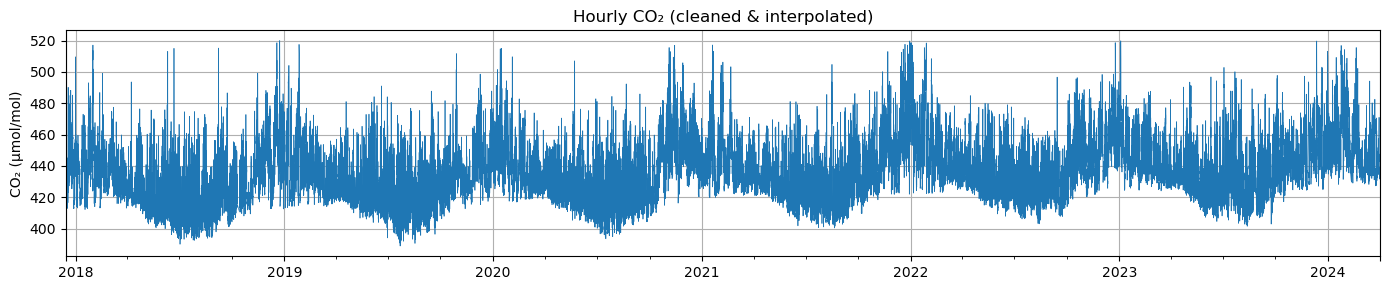

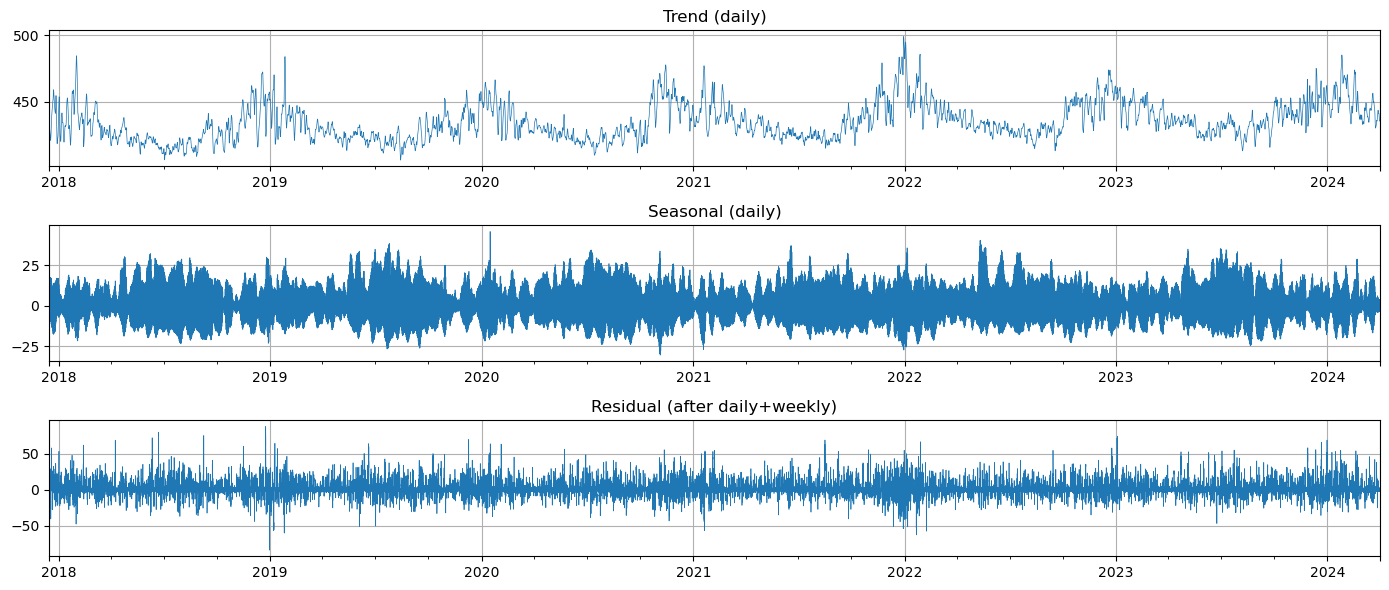

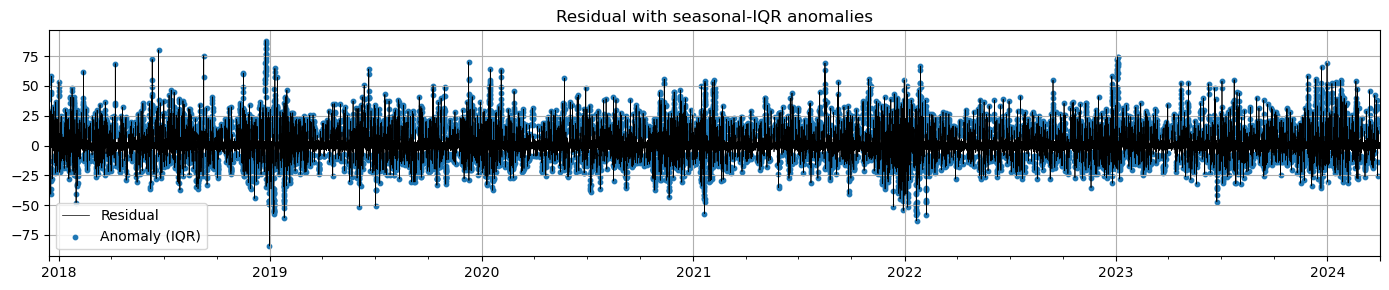


=== Sample weights preview ===
                     anomaly_flag  sample_weight
2017-12-15 00:00:00          True            0.3
2017-12-15 01:00:00          True            0.3
2017-12-15 02:00:00          True            0.3
2017-12-15 03:00:00          True            0.3
2017-12-15 04:00:00         False            1.0
2017-12-15 05:00:00         False            1.0
2017-12-15 06:00:00         False            1.0
2017-12-15 07:00:00         False            1.0
2017-12-15 08:00:00          True            0.3
2017-12-15 09:00:00         False            1.0
2017-12-15 10:00:00         False            1.0
2017-12-15 11:00:00          True            0.3

=== Monthly anomaly rate (%), by Year-Month ===
         1      2      3      4      5      6      7      8      9      10  \
2017   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
2018  25.81  17.86  22.31  10.14  10.35  17.22  19.22  17.34  16.94  12.50   
2019  35.48  20.09  13.44  11.81  12.77  19.58  

In [3]:
# ==== 1) 缺失插补 ====
df_full['co2'] = df_full['co2'].interpolate(method='time').ffill().bfill()

print("\n=== Basic stats after interpolation ===")
print(df_full['co2'].describe())

# ==== 2) STL（日 + 周）====
from statsmodels.tsa.seasonal import STL

DAILY_PERIOD = 24
WEEKLY_PERIOD = 24 * 7

stl_daily = STL(df_full['co2'], period=DAILY_PERIOD, robust=True).fit()
df_full['trend_daily']    = stl_daily.trend
df_full['seasonal_daily'] = stl_daily.seasonal
df_full['resid_daily']    = stl_daily.resid

stl_week = STL(df_full['resid_daily'], period=WEEKLY_PERIOD, robust=True).fit()
df_full['seasonal_week'] = stl_week.seasonal
df_full['resid']         = stl_week.resid  # 最终用于检测的残差

# 快速查看几行
print("\n=== Head (with STL components) ===")
print(df_full[['co2','trend_daily','seasonal_daily','seasonal_week','resid']].head())

print("\n=== Tail (with STL components) ===")
print(df_full[['co2','trend_daily','seasonal_daily','seasonal_week','resid']].tail())

# ==== 3) 季节化 IQR 异常检测 ====
import numpy as np

def seasonal_iqr_flags(series, index, by='dowhour', k=1.5):
    """
    对残差做季节化 IQR 异常检测。
    by='hour'：按一天24个小时分组
    by='dowhour'：按一周内的168个小时分组（更细）
    """
    if by == 'hour':
        keys = index.hour
    elif by == 'dowhour':
        keys = index.dayofweek * 24 + index.hour
    else:
        raise ValueError("by must be 'hour' or 'dowhour'")

    flags = np.zeros(len(series), dtype=bool)
    vals = series.values
    for key in np.unique(keys):
        mask = (keys == key)
        grp = vals[mask]
        q1, q3 = np.nanpercentile(grp, [25, 75])
        iqr = q3 - q1
        lower, upper = q1 - k*iqr, q3 + k*iqr
        flags[mask] = (grp < lower) | (grp > upper)
    return pd.Series(flags, index=index)

df_full['anomaly_iqr_hour']    = seasonal_iqr_flags(df_full['resid'], df_full.index, by='hour',    k=1.5)
df_full['anomaly_iqr_dowhour'] = seasonal_iqr_flags(df_full['resid'], df_full.index, by='dowhour', k=1.5)
df_full['anomaly_flag']        = df_full[['anomaly_iqr_hour','anomaly_iqr_dowhour']].any(axis=1)

an_ratio = 100 * df_full['anomaly_flag'].mean()
print(f"\nAnomaly ratio (seasonal IQR): {an_ratio:.2f}%")
print("Anomaly counts:", int(df_full['anomaly_flag'].sum()))

# 列出残差绝对值最大的前 10 个异常点（直观看看）
top_anoms = (
    df_full.loc[df_full['anomaly_flag'], ['resid']]
    .assign(abs_resid=lambda x: x['resid'].abs())
    .sort_values('abs_resid', ascending=False)
    .head(10)
)
print("\n=== Top-10 anomalies by |resid| ===")
print(top_anoms)

# ==== 4) 可视化（原序列、STL、残差+异常）====
import matplotlib.pyplot as plt

# 原序列（平滑后）
plt.figure(figsize=(14, 3))
df_full['co2'].plot(lw=0.5) 
plt.title('Hourly CO₂ (cleaned & interpolated)')
plt.ylabel('CO₂ (µmol/mol)')
plt.grid(True)
plt.tight_layout()
plt.show()

# STL 三联图
plt.figure(figsize=(14, 6))
plt.subplot(3,1,1); df_full['trend_daily'].plot(lw=0.5);    plt.title('Trend (daily)');    plt.grid(True)
plt.subplot(3,1,2); df_full['seasonal_daily'].plot(lw=0.5); plt.title('Seasonal (daily)'); plt.grid(True)
plt.subplot(3,1,3); df_full['resid'].plot(lw=0.5);          plt.title('Residual (after daily+weekly)'); plt.grid(True)
plt.tight_layout(); plt.show()

# 残差 + 异常散点
plt.figure(figsize=(14, 3))
df_full['resid'].plot(color='black',lw=0.5, label='Residual')
an_idx = df_full.index[df_full['anomaly_flag']]
plt.scatter(an_idx, df_full.loc[an_idx, 'resid'], s=10, label='Anomaly (IQR)')
plt.title('Residual with seasonal-IQR anomalies')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ==== 5) 供训练用的样本权重（直接保存在内存，不写文件）====
df_full['sample_weight'] = np.where(df_full['anomaly_flag'], 0.3, 1.0)

print("\n=== Sample weights preview ===")
print(df_full[['anomaly_flag','sample_weight']].head(12))

# （可选）按月份/小时统计异常率，直观看缺陷分布
monthly_anom = df_full['anomaly_flag'].groupby([df_full.index.year, df_full.index.month]).mean()*100
hourly_anom  = df_full['anomaly_flag'].groupby(df_full.index.hour).mean()*100

print("\n=== Monthly anomaly rate (%), by Year-Month ===")
print(monthly_anom.unstack(fill_value=0).round(2))

print("\n=== Hour-of-day anomaly rate (%) ===")
print(hourly_anom.round(2))

In [4]:
# # ==== PELT change-point detection on residuals ====
# # 安装：pip install ruptures
# import numpy as np
# import ruptures as rpt
# import matplotlib.pyplot as plt

# # 1) 数据准备：用残差（可以先做标准化，提升稳定性）
# resid = df_full['resid'].values.astype(float)
# resid = (resid - np.nanmean(resid)) / (np.nanstd(resid) + 1e-8)

# # 2) 运行 PELT
# # model 可选 'rbf'（对均值+方差更敏感）或 'l2'（均值变点），min_size 控制段长
# algo = rpt.Pelt(model="rbf", min_size=24, jump=1).fit(resid)

# # 惩罚项越大, 检测到的变点越少；可根据验证效果调节
# penalty = 20  # 可尝试 10, 20, 40 ...
# bkps = algo.predict(pen=penalty)  # 返回段尾索引列表（含最后一个点）
# # 转换为变点索引（不含最后一段的终点）
# change_points = [b for b in bkps[:-1]]

# print(f"Detected {len(change_points)} change points (pen={penalty}):")
# print(change_points[:20], "..." if len(change_points) > 20 else "")

# # 3) 画图：残差 + 变点 + 各段均值
# t = np.arange(len(resid))

# plt.figure(figsize=(14, 3))
# plt.plot(df_full.index, resid, lw=0.8, label="Residual (z-score)")
# for cp in change_points:
#     plt.axvline(df_full.index[cp], color="tab:red", alpha=0.6, lw=1)
# # 画每一段的均值
# start = 0
# for end in bkps:
#     seg_mean = np.nanmean(resid[start:end])
#     plt.hlines(seg_mean, df_full.index[start], df_full.index[end-1], colors="tab:blue", lw=1)
#     start = end
# plt.title("Residuals with PELT change points and segment means")
# plt.grid(True); plt.tight_layout(); plt.show()

# # 4) 把变点转成“分段权重”（示例：变点邻域降权）
# # 直观做法：变点前后各 W 个点降权（回避过渡段）
# W = 12  # 邻域半宽，单位：小时
# weights_cp = np.ones(len(df_full), dtype=float)
# for cp in change_points:
#     lo = max(cp - W, 0)
#     hi = min(cp + W, len(df_full) - 1)
#     weights_cp[lo:hi+1] = 0.5  # 变点邻域降到 0.5（可调）

# # 5) 与异常权重合并（若你已做 anomaly_flag）
# if 'sample_weight' in df_full.columns:
#     combined_weight = df_full['sample_weight'].values * weights_cp
# else:
#     combined_weight = weights_cp

# df_full['cp_weight'] = weights_cp
# df_full['train_weight'] = combined_weight

# print("\n=== Weight summary ===")
# print(pd.Series(df_full['train_weight']).describe())

# # 6) 可视化权重分布（可选）
# plt.figure(figsize=(14, 2.2))
# plt.plot(df_full.index, df_full['train_weight'], lw=0.8)
# plt.ylim(-0.05, 1.05)
# plt.title("Training weights (anomaly × changepoint neighborhood)")
# plt.grid(True); plt.tight_layout(); plt.show()



=== Horizon=6h | Dense k sweep from 0 to 150 ===
      k   val_MAE  anomaly_rate_%
0  0.00  9.066342       49.934754
1  0.01  9.118741       49.153618
2  0.02  9.126845       48.515659
3  0.03  9.163090       47.872263
4  0.04  9.144180       47.301363
5  0.05  9.033472       46.712339
6  0.06  9.065876       46.061693
7  0.07  9.107570       45.423735
8  0.08  9.154619       44.789401
9  0.09  9.155648       44.220313
...
           k  val_MAE  anomaly_rate_%
271   91.775  8.73707             0.0
272   96.924  8.73707             0.0
273  102.362  8.73707             0.0
274  108.105  8.73707             0.0
275  114.170  8.73707             0.0
276  120.576  8.73707             0.0
277  127.341  8.73707             0.0
278  134.486  8.73707             0.0
279  142.031  8.73707             0.0
280  150.000  8.73707             0.0

Best k = 1.040, MAE = 8.462191, anomaly_rate = 20.17%
MAE (no filtering, k=∞) = 8.737070


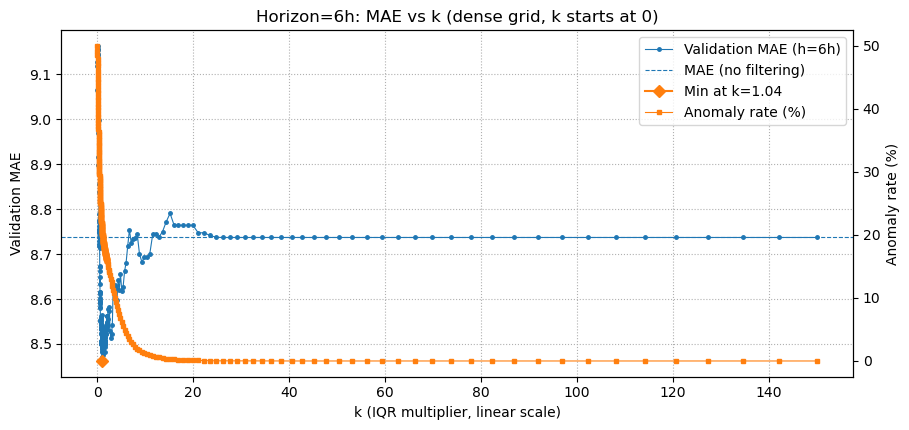

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 准备：co2 & resid =========
try:
    _ = df_full['co2']
except Exception as e:
    raise RuntimeError("未找到 df_full['co2']，请先按你之前的步骤构建 df_full（含 co2 列）。") from e

if 'resid' not in df_full.columns:
    from statsmodels.tsa.seasonal import STL
    s = df_full['co2'].astype(float).copy()
    s = s.interpolate(method='time').ffill().bfill()
    stl1 = STL(s, period=24, robust=True).fit()
    stl2 = STL(stl1.resid, period=24*7, robust=True).fit()
    df_full['resid'] = stl2.resid

series = df_full['co2'].astype(float)
resid  = df_full['resid'].astype(float)

# ========= 方法函数 =========
def seasonal_iqr_flags(series_like, index, by='dowhour', k=1.5):
    if by == 'hour':
        keys = index.hour
    elif by == 'dowhour':
        keys = index.dayofweek * 24 + index.hour
    else:
        raise ValueError("by must be 'hour' or 'dowhour'")
    flags = np.zeros(len(series_like), dtype=bool)
    vals = np.asarray(series_like, dtype=float)
    for key in np.unique(keys):
        m = (keys == key)
        grp = vals[m]
        q1, q3 = np.nanpercentile(grp, [25, 75])
        iqr = q3 - q1
        lo, hi = q1 - k*iqr, q3 + k*iqr
        flags[m] = (grp < lo) | (grp > hi)
    return pd.Series(flags, index=index)

def seasonal_profile_forecast(s, flags, t, horizon=6, days_back=7, agg="median"):
    preds = []
    for h in range(horizon):
        idx = t + h
        vals = []
        for d in range(1, days_back+1):
            j = idx - 24*d
            if j < 0: 
                continue
            if not bool(flags.iloc[j]):
                vals.append(float(s.iloc[j]))
        if len(vals) == 0:
            preds.append(float(s.iloc[idx-24]) if idx-24 >= 0 else float(s.iloc[max(0, idx-1):idx].median()))
        else:
            preds.append(float(np.median(vals) if agg=="median" else np.mean(vals)))
    return np.array(preds)

def rolling_eval_for_k(k, series, resid, lookback=24*30, horizon=6, steps=40, days_back=7):
    flags = seasonal_iqr_flags(resid, resid.index, by='dowhour', k=k).reset_index(drop=True)
    s = series.reset_index(drop=True)
    maes = []
    end_idx = len(s) - horizon
    idxs = np.linspace(lookback + 24, end_idx, steps, dtype=int)
    for t in idxs:
        y_true = s.iloc[t:t+horizon].values
        y_pred = seasonal_profile_forecast(s, flags, t, horizon=horizon, days_back=days_back, agg="median")
        maes.append(np.mean(np.abs(y_true - y_pred)))
    return float(np.mean(maes)), float(flags.mean()*100.0)

def rolling_eval_no_filter(series, horizon=6, lookback=24*30, steps=40, days_back=7):
    s = series.reset_index(drop=True)
    flags = pd.Series(False, index=s.index)
    maes = []
    end_idx = len(s) - horizon
    idxs = np.linspace(lookback + 24, end_idx, steps, dtype=int)
    for t in idxs:
        y_true = s.iloc[t:t+horizon].values
        y_pred = seasonal_profile_forecast(s, flags, t, horizon=horizon, days_back=days_back, agg="median")
        maes.append(np.mean(np.abs(y_true - y_pred)))
    return float(np.mean(maes))

# ========= 更密集的 k 网格（包含 0） =========
# 0～2 用细线性网格；2～150 用对数网格，但最终都在同一线性坐标上绘制
k_lin_fine = np.round(np.linspace(0.0, 2.0, 201), 3).tolist()     # 步长 0.01，含 0
k_log_tail = np.round(np.geomspace(2.01, 150.0, 80), 3).tolist()  # 2.01→150 对数分布
Ks = sorted(set(k_lin_fine + k_log_tail))

rows = []
for k in Ks:
    mae_k, rate_k = rolling_eval_for_k(k, series, resid, lookback=24*30, horizon=6, steps=40, days_back=7)
    rows.append({"k": float(k), "val_MAE": mae_k, "anomaly_rate_%": rate_k})
res = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)

# 无剔除基线
mae_no_filter = rolling_eval_no_filter(series, horizon=6, lookback=24*30, steps=40, days_back=7)

# 找最小点
i_min   = int(res["val_MAE"].idxmin())
k_min   = float(res.loc[i_min, "k"])
mae_min = float(res.loc[i_min, "val_MAE"])
rate_min= float(res.loc[i_min, "anomaly_rate_%"])

print("\n=== Horizon=6h | Dense k sweep from 0 to 150 ===")
print(res.head(10))
print("...")
print(res.tail(10))
print(f"\nBest k = {k_min:.3f}, MAE = {mae_min:.6f}, anomaly_rate = {rate_min:.2f}%")
print(f"MAE (no filtering, k=∞) = {mae_no_filter:.6f}")

# ========= 绘图（线性刻度，去掉 smoothed 线） =========
fig, ax1 = plt.subplots(figsize=(9.2, 4.4))
ax1.plot(res["k"], res["val_MAE"], marker="o", ms=2.5, lw=0.8, label="Validation MAE (h=6h)")
ax1.axhline(mae_no_filter, linestyle="--", lw=0.8, label="MAE (no filtering)")
ax1.plot([k_min], [mae_min], marker="D", ms=6, label=f"Min at k={k_min:.2f}")
ax1.set_xlabel("k (IQR multiplier, linear scale)")
ax1.set_ylabel("Validation MAE"); ax1.grid(True, ls=":")
ax1.set_title("Horizon=6h: MAE vs k (dense grid, k starts at 0)")

ax2 = ax1.twinx()
ax2.plot(res["k"], res["anomaly_rate_%"], marker="s", ms=2.5, lw=0.8, color="tab:orange", label="Anomaly rate (%)")
ax2.set_ylabel("Anomaly rate (%)")

# 合并图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="best")

plt.tight_layout()
plt.show()


=== Sample weights preview ===
                     anomaly_flag  sample_weight
2017-12-15 00:00:00          True            0.3
2017-12-15 01:00:00          True            0.3
2017-12-15 02:00:00          True            0.3
2017-12-15 03:00:00          True            0.3
2017-12-15 04:00:00         False            1.0
2017-12-15 05:00:00         False            1.0
2017-12-15 06:00:00         False            1.0
2017-12-15 07:00:00         False            1.0
2017-12-15 08:00:00          True            0.3
2017-12-15 09:00:00         False            1.0
2017-12-15 10:00:00         False            1.0
2017-12-15 11:00:00          True            0.3
2017-12-15 12:00:00         False            1.0
2017-12-15 13:00:00         False            1.0
2017-12-15 14:00:00         False            1.0
2017-12-15 15:00:00         False            1.0
2017-12-15 16:00:00         False            1.0
2017-12-15 17:00:00         False            1.0
2017-12-15 18:00:00         False     

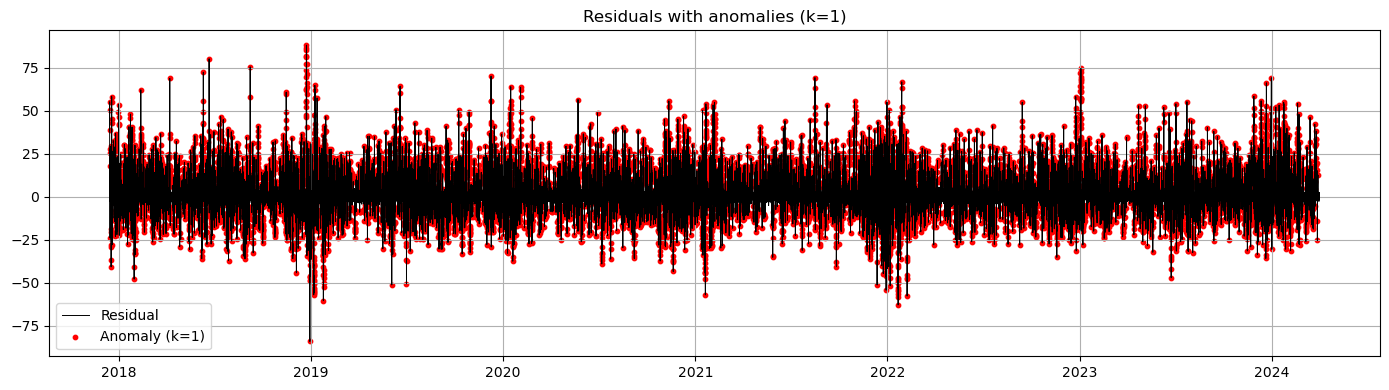

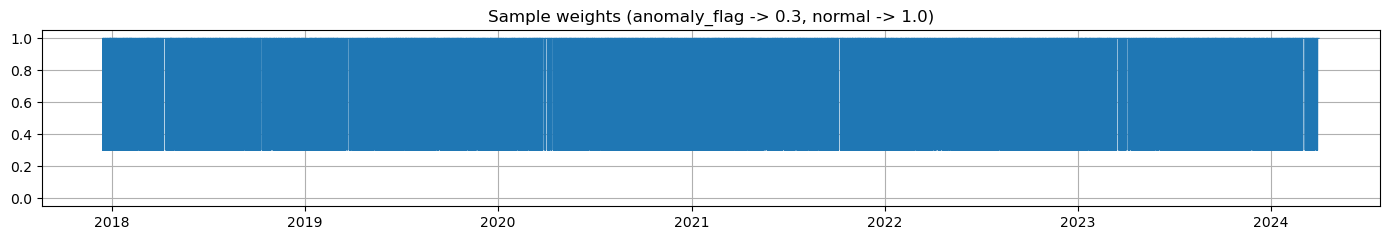

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: 用最佳 k=1 生成 anomaly_flag ===
def seasonal_iqr_flags(series, index, by="dowhour", k=1.0):
    """基于 IQR 的异常检测, 按小时-of-week 分组"""
    df_tmp = pd.DataFrame({"y": series}, index=index)
    if by == "dowhour":
        grp = df_tmp.groupby([df_tmp.index.dayofweek, df_tmp.index.hour])["y"]
    elif by == "hour":
        grp = df_tmp.groupby(df_tmp.index.hour)["y"]
    else:
        raise ValueError("by must be 'dowhour' or 'hour'")

    q1 = grp.transform(lambda x: x.quantile(0.25))
    q3 = grp.transform(lambda x: x.quantile(0.75))
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return ~df_tmp["y"].between(lower, upper)

# 生成 anomaly_flag
df_full["anomaly_flag"] = seasonal_iqr_flags(df_full["resid"], df_full.index, by="dowhour", k=1.0)

# === Step 2: 转换成 sample_weight ===
# 这里异常点降权为 0.3, 正常点为 1.0 (可调整)
df_full["sample_weight"] = np.where(df_full["anomaly_flag"], 0.3, 1.0)

# === Step 3: 查看结果 ===
print("=== Sample weights preview ===")
print(df_full[["anomaly_flag", "sample_weight"]].head(20))

# 异常率
anomaly_rate = df_full["anomaly_flag"].mean() * 100
print(f"\nAnomaly rate at k=1.0: {anomaly_rate:.2f}%")

# === Step 4: 可视化 ===
plt.figure(figsize=(14, 4))
plt.plot(df_full.index, df_full["resid"], lw=0.7, color="black", label="Residual")
plt.scatter(
    df_full.index[df_full["anomaly_flag"]],
    df_full["resid"][df_full["anomaly_flag"]],
    color="red", s=10, label="Anomaly (k=1)"
)
plt.title("Residuals with anomalies (k=1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 权重分布图
plt.figure(figsize=(14, 2.5))
plt.plot(df_full.index, df_full["sample_weight"], lw=0.7)
plt.ylim(-0.05, 1.05)
plt.title("Sample weights (anomaly_flag -> 0.3, normal -> 1.0)")
plt.grid(True)
plt.tight_layout()
plt.show()


=== Page–Hinkley parameters ===
delta=1.302, lambda=217.028, alpha=0.995
Detected change points: 148
[279, 407, 683, 952, 1021, 1419, 1426, 2169, 2372, 2744, 4271, 4277, 4983, 5069, 6411, 6775, 7929, 8057, 8416, 8763] ...

=== Weight summary ===
count    55176.00000
mean         0.83930
std          0.29621
min          0.15000
25%          1.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: train_weight, dtype: float64


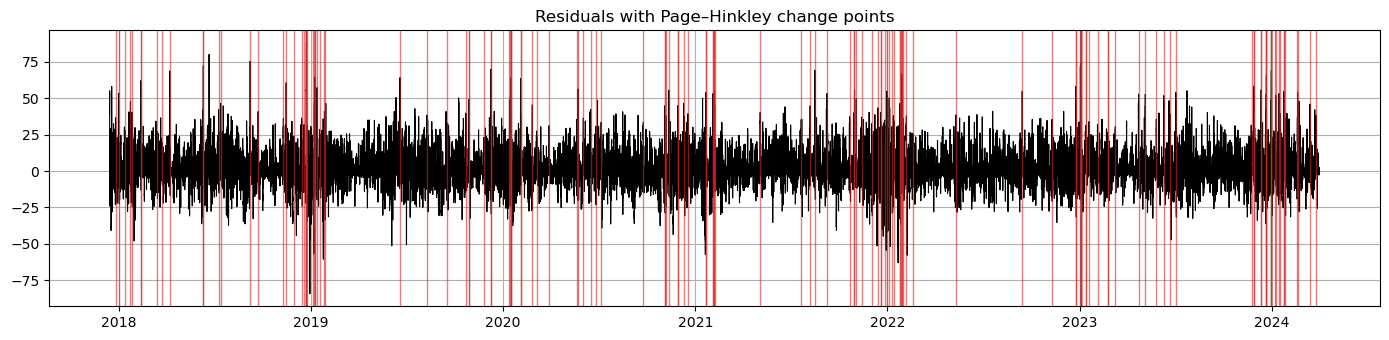

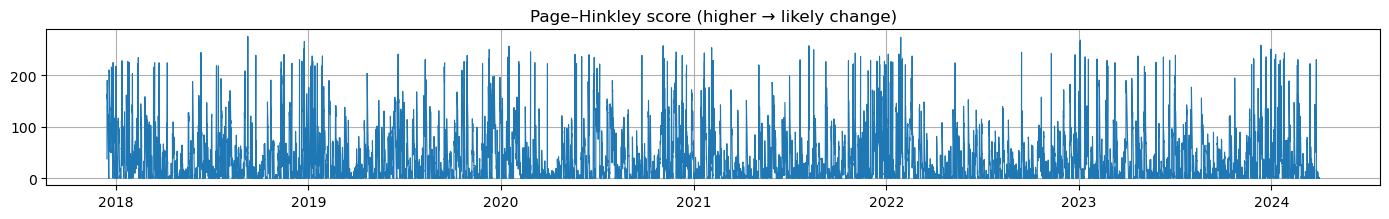

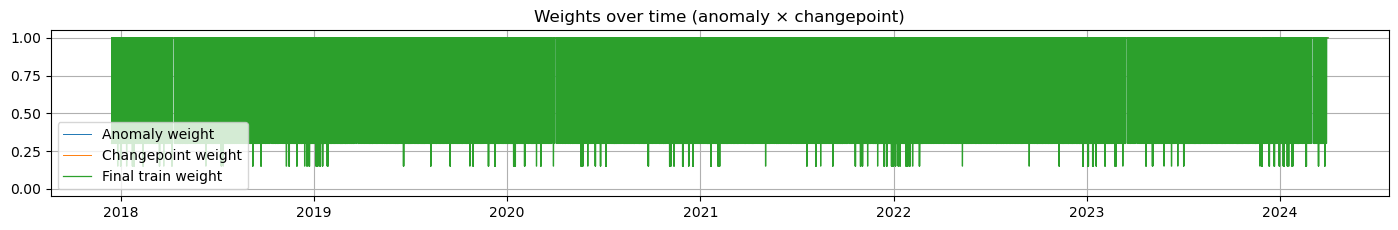


Tuning tips:
- 如果变点太少/漏检：减小 lambda 或增大 delta？(一般是减小 lambda 或减小 delta)
- 如果变点过多/误检：增大 lambda 或增大 delta；或者加大 alpha（更强遗忘会更敏感，小心误检）
- 降权窗 W 典型取 6–24 小时，短期预测可略大一些（如 12–24）


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 0) 前置检查：co2 & resid & sample_weight =========
try:
    _ = df_full['co2']
except Exception as e:
    raise RuntimeError("未找到 df_full['co2']，请先构建 df_full（含 co2 列）。") from e

if 'resid' not in df_full.columns:
    # 若还未做STL，自动补一次（日与周）
    from statsmodels.tsa.seasonal import STL
    s = df_full['co2'].astype(float).copy()
    s = s.interpolate(method='time').ffill().bfill()
    stl1 = STL(s, period=24, robust=True).fit()
    stl2 = STL(stl1.resid, period=24*7, robust=True).fit()
    df_full['resid'] = stl2.resid

if 'sample_weight' not in df_full.columns:
    # 若还未生成anomaly-based权重，这里给个缺省：全1
    df_full['sample_weight'] = 1.0

resid = df_full['resid'].astype(float).values

# ========= 1) Page–Hinkley 变点检测 =========
def page_hinkley(x, delta=0.5, lam=50.0, alpha=0.99, return_scores=False):
    """
    简单PH实现（对均值突变敏感）
    x: 序列（numpy向量）
    delta: 容忍的微小漂移（越大越不敏感）
    lam: 报警阈值（越大越不敏感）
    alpha: 更新速率(0<alpha<=1)，<1时能让统计量更“遗忘”旧数据，适合非平稳
    return_scores: 是否返回得分序列（便于调参可视化）
    返回: 变点索引列表（不含最后终点），可选分数
    """
    x = np.asarray(x, dtype=float)
    n = len(x)
    mean = 0.0
    PH = 0.0
    mPH = 0.0
    scores = np.zeros(n)
    cps = []

    for t in range(n):
        # 指数加权均值，增强对长趋势漂移的鲁棒性
        mean = alpha * mean + (1 - alpha) * x[t]
        PH = PH + (x[t] - mean - delta)
        mPH = min(mPH, PH)
        scores[t] = PH - mPH
        if scores[t] > lam:
            cps.append(t)
            # 重置统计量，继续向后检测后续的变点
            PH = 0.0
            mPH = 0.0
            mean = 0.0

    return (cps, scores) if return_scores else (cps, None)

# === 1.1) 根据残差尺度自适应设置参数（给出一个合理起点）
resid_std = np.nanstd(resid)
delta = max(0.2, 0.15 * resid_std)   # 对小波动容忍；残差std的15%
lam   = 25.0 * max(1.0, resid_std)   # 阈值与尺度相关
alpha = 0.995                         # 轻微遗忘，适应慢变

cp_idx, ph_scores = page_hinkley(resid, delta=delta, lam=lam, alpha=alpha, return_scores=True)

print("=== Page–Hinkley parameters ===")
print(f"delta={delta:.3f}, lambda={lam:.3f}, alpha={alpha}")
print(f"Detected change points: {len(cp_idx)}")
print(cp_idx[:20], "..." if len(cp_idx) > 20 else "")

# ========= 2) 变点邻域降权（合并为最终训练权重）=========
# 窗宽 W：变点前后各 W 小时降权（避免过渡期对训练的干扰）
W = 12   # 你可以在 6–24 内微调
cp_weight = np.ones(len(df_full), dtype=float)
for cp in cp_idx:
    lo = max(cp - W, 0)
    hi = min(cp + W, len(df_full) - 1)
    cp_weight[lo:hi+1] = np.minimum(cp_weight[lo:hi+1], 0.5)  # 邻域降至 0.5，可调如0.3/0.7

df_full['cp_weight']    = cp_weight
df_full['train_weight'] = df_full['sample_weight'].values * df_full['cp_weight'].values

print("\n=== Weight summary ===")
print(pd.Series(df_full['train_weight']).describe())

# ========= 3) 可视化：残差+变点 & 权重 =========
# 3.1 残差 + 变点
plt.figure(figsize=(14, 3.5))
plt.plot(df_full.index, df_full['resid'].values, lw=0.8, color='black', label='Residual')
for cp in cp_idx:
    plt.axvline(df_full.index[cp], color='tab:red', lw=1.0, alpha=0.6)
plt.title("Residuals with Page–Hinkley change points")
plt.grid(True); plt.tight_layout(); plt.show()

# 3.2 Page–Hinkley 累积得分（可帮助你调参）
plt.figure(figsize=(14, 2.3))
plt.plot(df_full.index, ph_scores, lw=0.8, label='PH score')
plt.title("Page–Hinkley score (higher → likely change)")
plt.grid(True); plt.tight_layout(); plt.show()

# 3.3 权重随时间
plt.figure(figsize=(14, 2.4))
plt.plot(df_full.index, df_full['sample_weight'], lw=0.7, label='Anomaly weight')
plt.plot(df_full.index, df_full['cp_weight'], lw=0.7, label='Changepoint weight')
plt.plot(df_full.index, df_full['train_weight'], lw=0.9, label='Final train weight')
plt.ylim(-0.05, 1.05)
plt.title("Weights over time (anomaly × changepoint)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ========= 4) 小贴士：怎么调灵敏度 =========
print("\nTuning tips:")
print("- 如果变点太少/漏检：减小 lambda 或增大 delta？(一般是减小 lambda 或减小 delta)")
print("- 如果变点过多/误检：增大 lambda 或增大 delta；或者加大 alpha（更强遗忘会更敏感，小心误检）")
print("- 降权窗 W 典型取 6–24 小时，短期预测可略大一些（如 12–24）")



=== Grid summary (head) ===
   delta_frac  lambda_mult     delta      lambda  cp_count  cp_per_year
0        0.05            5  0.434057   43.405676      1798   285.659592
1        0.05           10  0.434057   86.811353       820   130.278568
2        0.05           15  0.434057  130.217029       474    75.307367
3        0.05           20  0.434057  173.622706       315    50.046035
4        0.05           25  0.434057  217.028382       208    33.046271

resid_std = 8.681, years ≈ 6.29, total hours = 55176


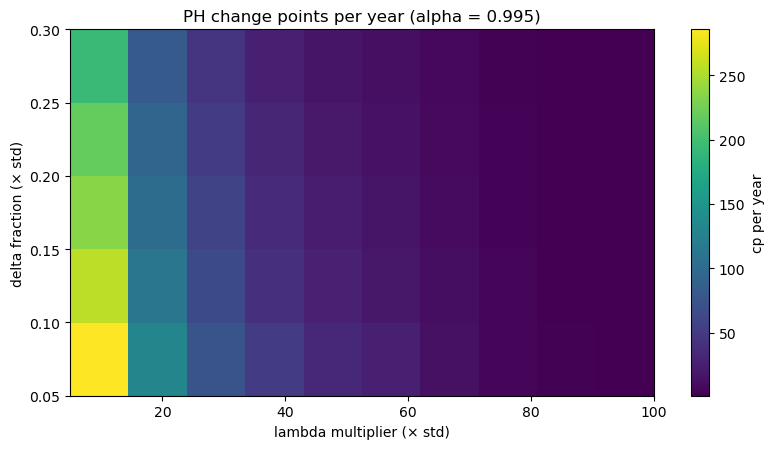


=== Candidate (cp/year within target or nearest) ===
   delta_frac  lambda_mult     delta      lambda  cp_count  cp_per_year
0        0.05           60  0.434057  520.868117        37     5.878423
1        0.10           60  0.868114  520.868117        28     4.448536
2        0.15           60  1.302170  520.868117        27     4.289660
3        0.20           60  1.736227  520.868117        22     3.495279
4        0.15           40  1.302170  347.245411        59     9.373702
5        0.20           40  1.736227  347.245411        50     7.943815
6        0.30           40  2.604341  347.245411        44     6.990557

=== Coverage under different W (using first candidate) ===
    W  coverage_%
0   6    0.853632
1  12    1.576773
2  18    2.294476
3  24    3.012179


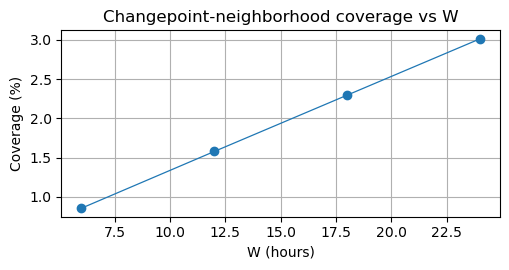


=== Chosen PH params ===
delta = 0.4341  (≈ 0.050 × std)
lambda = 520.8681 (≈ 60.0 × std)
alpha = 0.995
W = 24 hours

=== Weight summary ===
count    55176.000000
mean         0.846680
std          0.290179
min          0.150000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: train_weight, dtype: float64


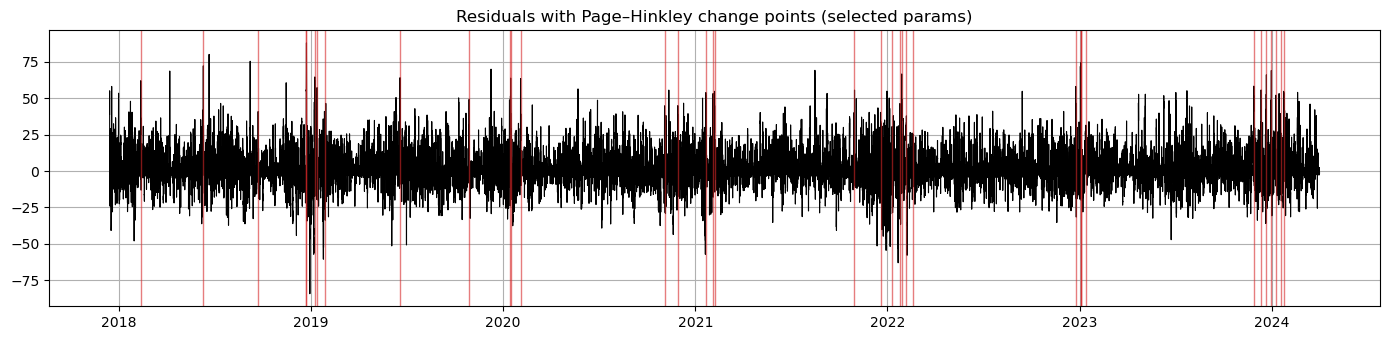

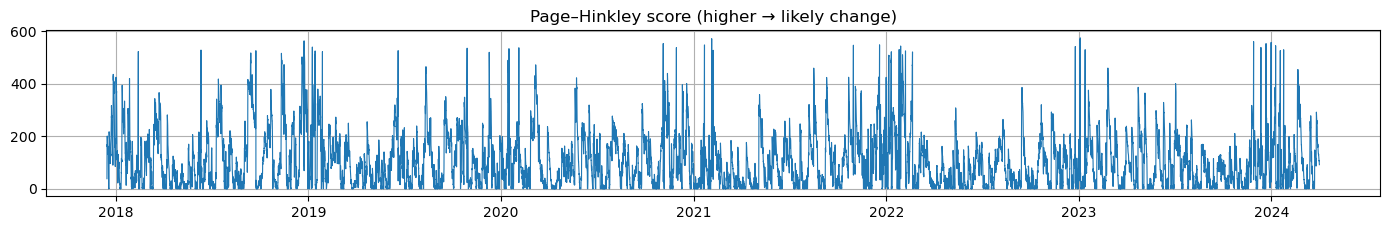

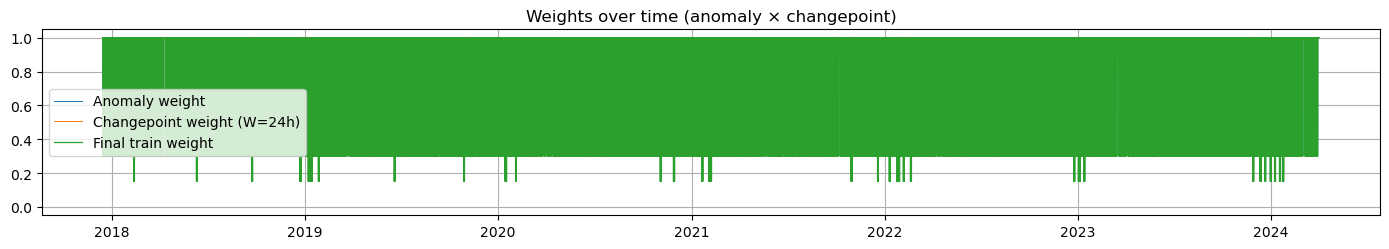


Tips:
1) 若变点过多：增大 lambda_mult 或增大 delta_frac；
2) 若变点太少：减小 lambda_mult 或减小 delta_frac；
3) 若过渡区过宽：减小 W；若过窄：增大 W；
4) 你也可以把目标 cp/年 (low, high) 调成你期望的区间，然后重跑。


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 0) 前置：确保 resid & sample_weight 存在 =========
try:
    _ = df_full['co2']
except Exception as e:
    raise RuntimeError("未找到 df_full['co2']，请先构建 df_full（含 co2 列）。") from e

if 'resid' not in df_full.columns:
    # 若未做STL，这里自动做一遍
    from statsmodels.tsa.seasonal import STL
    s = df_full['co2'].astype(float).copy()
    s = s.interpolate(method='time').ffill().bfill()
    stl1 = STL(s, period=24, robust=True).fit()
    stl2 = STL(stl1.resid, period=24*7, robust=True).fit()
    df_full['resid'] = stl2.resid

if 'sample_weight' not in df_full.columns:
    # 若还未设置异常权重，则默认全1
    df_full['sample_weight'] = 1.0

idx = df_full.index
resid = df_full['resid'].astype(float).values
T_hours = len(df_full)
years = max(1e-9, (idx[-1] - idx[0]).total_seconds() / (3600*24*365.25))  # 用于 cp/year

# ========= 1) Page–Hinkley 实现 =========
def page_hinkley(x, delta=0.5, lam=50.0, alpha=0.99, return_scores=False):
    x = np.asarray(x, dtype=float)
    n = len(x)
    mean = 0.0
    PH = 0.0
    mPH = 0.0
    scores = np.zeros(n)
    cps = []
    for t in range(n):
        mean = alpha * mean + (1 - alpha) * x[t]
        PH = PH + (x[t] - mean - delta)
        mPH = min(mPH, PH)
        scores[t] = PH - mPH
        if scores[t] > lam:
            cps.append(t)
            PH = 0.0; mPH = 0.0; mean = 0.0
    return (cps, scores) if return_scores else (cps, None)

# ========= 2) 网格扫参：delta × lambda（按残差尺度自适应） =========
resid_std = float(np.nanstd(resid))
alpha = 0.995

# delta 取残差 std 的若干比例；lambda 取 std 的若干倍
delta_fracs = [0.05, 0.10, 0.15, 0.20, 0.30]                 # × resid_std
lambda_mults = [5, 10, 15, 20, 25, 30, 40, 60, 80, 100]     # × resid_std

grid_rows = []
for dfac in delta_fracs:
    for lm in lambda_mults:
        delta = max(0.05, dfac * resid_std)
        lam = max(1.0, lm * resid_std)
        cps, _ = page_hinkley(resid, delta=delta, lam=lam, alpha=alpha, return_scores=False)
        cp_per_year = len(cps) / years
        grid_rows.append({
            "delta_frac": dfac, "lambda_mult": lm,
            "delta": delta, "lambda": lam,
            "cp_count": len(cps), "cp_per_year": cp_per_year
        })

df_grid = pd.DataFrame(grid_rows)

print("=== Grid summary (head) ===")
print(df_grid.head())
print(f"\nresid_std = {resid_std:.3f}, years ≈ {years:.2f}, total hours = {T_hours}")

# ========= 3) 热力图：cp/year vs (delta_frac, lambda_mult) =========
# 构建矩阵
df_piv = df_grid.pivot(index="delta_frac", columns="lambda_mult", values="cp_per_year").sort_index(ascending=True)
plt.figure(figsize=(8.2, 4.6))
im = plt.imshow(df_piv.values, aspect="auto", origin="lower",
                extent=[min(lambda_mults), max(lambda_mults), min(delta_fracs), max(delta_fracs)])
plt.colorbar(im, label="cp per year")
plt.xlabel("lambda multiplier (× std)")
plt.ylabel("delta fraction (× std)")
plt.title("PH change points per year (alpha = 0.995)")
plt.grid(False)
plt.tight_layout()
plt.show()

# ========= 4) 选择一个目标 cp/年，并给出候选参数 =========
# 目标：每年 3~10 个变点（你可以调整）
low, high = 3.0, 10.0
df_cand = df_grid[(df_grid["cp_per_year"] >= low) & (df_grid["cp_per_year"] <= high)].copy()
if df_cand.empty:
    # 若空，则选接近 low 的
    df_cand = df_grid.iloc[(df_grid["cp_per_year"] - low).abs().argsort()[:8]].copy()

# 选一个“相对保守且满足目标区间”的点：lambda_mult 较大、delta_frac 中等
df_cand = df_cand.sort_values(["lambda_mult", "delta_frac"], ascending=[False, True]).reset_index(drop=True)
print("\n=== Candidate (cp/year within target or nearest) ===")
print(df_cand.head(8))

# ========= 5) 窗口 W 的影响：同一组 (delta, lambda) 下比较不同 W 的覆盖率 =========
def cp_weight_from_indices(n, cp_indices, W=12, base=1.0, w_cp=0.5):
    w = np.full(n, base, dtype=float)
    for cp in cp_indices:
        lo = max(0, cp - W)
        hi = min(n-1, cp + W)
        w[lo:hi+1] = np.minimum(w[lo:hi+1], w_cp)
    return w

# 取一个候选（第一个）
delta_star = float(df_cand.iloc[0]["delta"])
lambda_star = float(df_cand.iloc[0]["lambda"])
cps_star, ph_scores = page_hinkley(resid, delta=delta_star, lam=lambda_star, alpha=alpha, return_scores=True)

W_list = [6, 12, 18, 24]
cover_rows = []
for W in W_list:
    w_cp = cp_weight_from_indices(T_hours, cps_star, W=W, base=1.0, w_cp=0.5)
    cover = np.mean(w_cp < 1.0) * 100.0   # 被降权覆盖的时间占比
    cover_rows.append({"W": W, "coverage_%": cover})
df_cover = pd.DataFrame(cover_rows)
print("\n=== Coverage under different W (using first candidate) ===")
print(df_cover)

plt.figure(figsize=(5.2, 2.8))
plt.plot(df_cover["W"], df_cover["coverage_%"], marker="o", lw=0.9)
plt.xlabel("W (hours)"); plt.ylabel("Coverage (%)")
plt.title("Changepoint-neighborhood coverage vs W")
plt.grid(True); plt.tight_layout(); plt.show()

# ========= 6) 一键落盘：按“目标 cp/年”自动选 (delta, lambda) + W =========
# 选择规则：
#  - 先在目标区间内选 lambda_mult 尽量大（更保守）、delta_frac 中等的组合；
#  - 再选使 coverage_% 在 5% ~ 20% 的 W（可调整）；
target_cover_lo, target_cover_hi = 5.0, 20.0
# 已有 delta_star, lambda_star
best_W = None
for W in W_list:
    w_cp = cp_weight_from_indices(T_hours, cps_star, W=W, base=1.0, w_cp=0.5)
    cover = np.mean(w_cp < 1.0) * 100.0
    if target_cover_lo <= cover <= target_cover_hi:
        best_W = W
        break
if best_W is None:
    # 若没命中区间，取 coverage 最接近 target_cover_lo 的
    diffs = []
    for W in W_list:
        w_cp = cp_weight_from_indices(T_hours, cps_star, W=W, base=1.0, w_cp=0.5)
        cover = np.mean(w_cp < 1.0) * 100.0
        diffs.append((abs(cover - target_cover_lo), W))
    best_W = min(diffs)[1]

print(f"\n=== Chosen PH params ===")
print(f"delta = {delta_star:.4f}  (≈ {delta_star/resid_std:.3f} × std)")
print(f"lambda = {lambda_star:.4f} (≈ {lambda_star/resid_std:.1f} × std)")
print(f"alpha = {alpha}")
print(f"W = {best_W} hours")

# ========= 7) 生成 cp_weight + train_weight，并可视化 =========
w_cp_final = cp_weight_from_indices(T_hours, cps_star, W=best_W, base=1.0, w_cp=0.5)
df_full["cp_weight"] = w_cp_final
df_full["train_weight"] = df_full["sample_weight"].values * df_full["cp_weight"].values

print("\n=== Weight summary ===")
print(pd.Series(df_full["train_weight"]).describe())

# 残差 + 变点
plt.figure(figsize=(14, 3.5))
plt.plot(idx, df_full['resid'].values, lw=0.8, color='black', label='Residual')
for cp in cps_star:
    plt.axvline(idx[cp], color='tab:red', lw=1.0, alpha=0.6)
plt.title("Residuals with Page–Hinkley change points (selected params)")
plt.grid(True); plt.tight_layout(); plt.show()

# PH 得分
plt.figure(figsize=(14, 2.4))
plt.plot(idx, ph_scores, lw=0.8, label="PH score")
plt.title("Page–Hinkley score (higher → likely change)")
plt.grid(True); plt.tight_layout(); plt.show()

# 权重
plt.figure(figsize=(14, 2.6))
plt.plot(idx, df_full['sample_weight'], lw=0.7, label='Anomaly weight')
plt.plot(idx, df_full['cp_weight'], lw=0.7, label=f'Changepoint weight (W={best_W}h)')
plt.plot(idx, df_full['train_weight'], lw=0.9, label='Final train weight')
plt.ylim(-0.05, 1.05)
plt.title("Weights over time (anomaly × changepoint)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

print("\nTips:")
print("1) 若变点过多：增大 lambda_mult 或增大 delta_frac；")
print("2) 若变点太少：减小 lambda_mult 或减小 delta_frac；")
print("3) 若过渡区过宽：减小 W；若过窄：增大 W；")
print("4) 你也可以把目标 cp/年 (low, high) 调成你期望的区间，然后重跑。")


=== CUSUM parameters ===
kappa = 0.8681  (~ 0.10 × std)
h     = 69.4491      (~ 8.0 × std)
Detected change points (CUSUM): 1412  ->  cp/year ≈ 224.33

=== Weight coverage (%) ===
PH-only coverage     :  3.01%
CUSUM-only coverage  : 37.30%
UNION  coverage      : 37.67%
INTERSECTION coverage:  2.64%


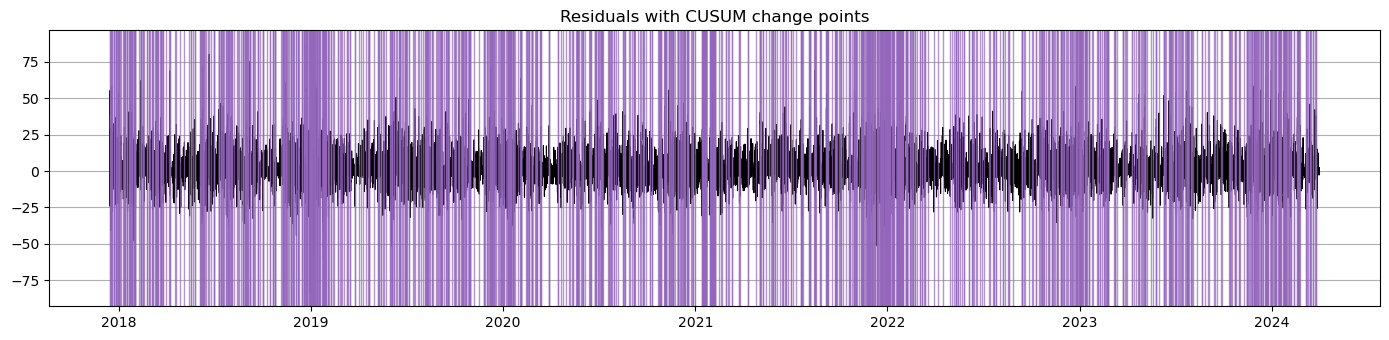

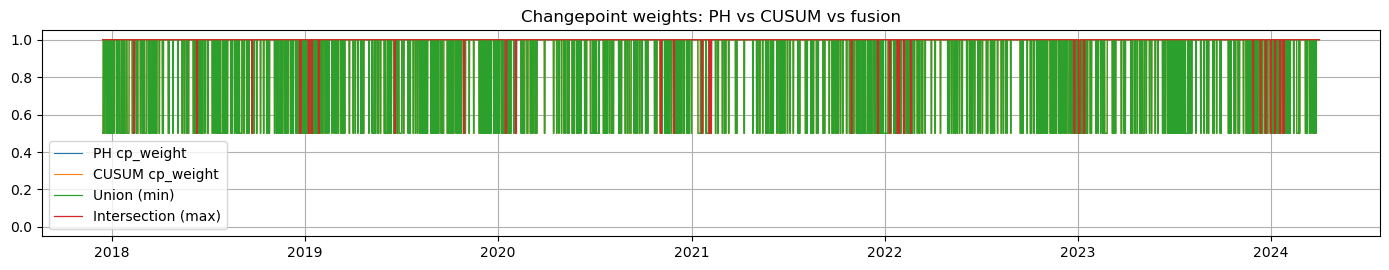

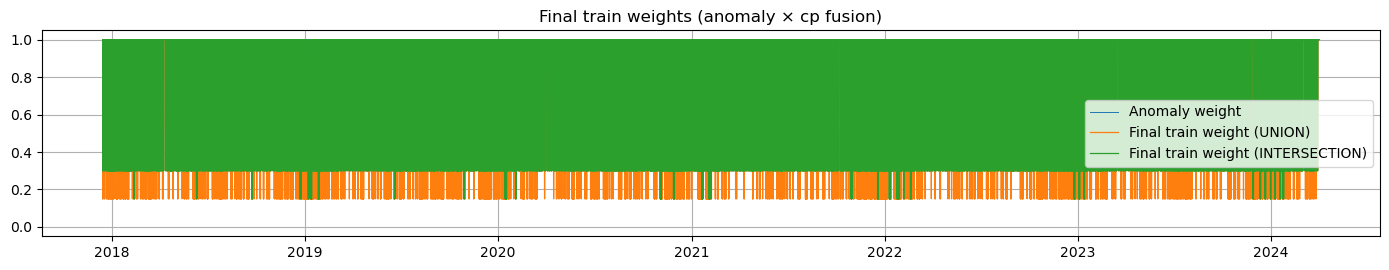


Tuning tips (CUSUM):
- 想更敏感：减小 h 或减小 kappa；
- 想更保守：增大 h 或增大 kappa；
- W 是邻域宽度，短期预测可取 12–24h，长期预测可适度减小；
- 建议将 UNION 与 INTERSECTION 都与验证误差对比，选择更稳的权重融合方案。


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ========= 0) 前置：确保 resid & sample_weight 存在 =========
try:
    _ = df_full['co2']
except Exception as e:
    raise RuntimeError("未找到 df_full['co2']，请先构建 df_full（含 co2 列）。") from e

if 'resid' not in df_full.columns:
    from statsmodels.tsa.seasonal import STL
    s = df_full['co2'].astype(float).copy().interpolate(method='time').ffill().bfill()
    stl1 = STL(s, period=24, robust=True).fit()
    stl2 = STL(stl1.resid, period=24*7, robust=True).fit()
    df_full['resid'] = stl2.resid

if 'sample_weight' not in df_full.columns:
    df_full['sample_weight'] = 1.0  # 若未做异常降权，这里先全部置1

idx   = df_full.index
resid = df_full['resid'].astype(float).values
T     = len(resid)
years = max(1e-9, (idx[-1] - idx[0]).total_seconds() / (3600*24*365.25))

# ========= 1) 双侧 CUSUM 实现（均值突变） =========
def cusum_detect(x, kappa, h, restart=True):
    """
    x: 序列 (np.ndarray)
    kappa: 漂移（参考线）参数，越大越不敏感；一般取残差std的一小部分
    h: 阈值，越大越不敏感
    restart: 触发后是否重置统计量（常用 True）
    返回: 变点索引列表
    """
    x = np.asarray(x, dtype=float)
    s_pos = 0.0
    s_neg = 0.0
    cps = []
    for t in range(len(x)):
        s_pos = max(0.0, s_pos + x[t] - kappa)
        s_neg = min(0.0, s_neg + x[t] + kappa)  # 注意负向累计
        if s_pos > h or s_neg < -h:
            cps.append(t)
            if restart:
                s_pos = 0.0
                s_neg = 0.0
    return cps

# 自适应参数：以残差标准差为尺度
resid_std = float(np.nanstd(resid))
# 经验起点（可调）：kappa 取 0.1*std，阈值 h 取 8*std
kappa = 0.10 * resid_std
h     = 8.0  * resid_std

cp_idx_cusum = cusum_detect(resid, kappa=kappa, h=h, restart=True)
print("=== CUSUM parameters ===")
print(f"kappa = {kappa:.4f}  (~ {kappa/resid_std:.2f} × std)")
print(f"h     = {h:.4f}      (~ {h/resid_std:.1f} × std)")
print(f"Detected change points (CUSUM): {len(cp_idx_cusum)}  ->  cp/year ≈ {len(cp_idx_cusum)/years:.2f}")

# ========= 2) 变点邻域降权：生成 cp_weight_cusum =========
def cp_weight_from_indices(n, cp_indices, W=12, base=1.0, w_cp=0.5):
    w = np.full(n, base, dtype=float)
    for cp in cp_indices:
        lo = max(0, cp - W); hi = min(n-1, cp + W)
        w[lo:hi+1] = np.minimum(w[lo:hi+1], w_cp)
    return w

W_cusum  = 12          # 变点前后各12小时降权（可调 6–24）
w_level  = 0.5         # 降权到 0.5（可调 0.3/0.7）
cp_weight_cusum = cp_weight_from_indices(T, cp_idx_cusum, W=W_cusum, base=1.0, w_cp=w_level)
df_full['cp_weight_cusum'] = cp_weight_cusum

# ========= 3) 与 Page–Hinkley 的合成（若已存在 cp_weight） =========
if 'cp_weight' in df_full.columns:
    cp_weight_ph = df_full['cp_weight'].astype(float).values
else:
    cp_weight_ph = np.ones(T, dtype=float)

# 并集（更保守，谁检测到就降权）/ 交集（更严格，需两者都检测到）
cp_weight_union        = np.minimum(cp_weight_ph, cp_weight_cusum)
cp_weight_intersection = np.maximum(cp_weight_ph, cp_weight_cusum)

df_full['cp_weight_union']        = cp_weight_union
df_full['cp_weight_intersection'] = cp_weight_intersection

# 最终训练权重（与异常降权相乘）
sw = df_full['sample_weight'].astype(float).values
df_full['train_weight_union']        = sw * cp_weight_union
df_full['train_weight_intersection'] = sw * cp_weight_intersection

print("\n=== Weight coverage (%) ===")
print(f"PH-only coverage     : {100*np.mean(cp_weight_ph        < 1.0):5.2f}%")
print(f"CUSUM-only coverage  : {100*np.mean(cp_weight_cusum     < 1.0):5.2f}%")
print(f"UNION  coverage      : {100*np.mean(cp_weight_union     < 1.0):5.2f}%")
print(f"INTERSECTION coverage: {100*np.mean(cp_weight_intersection < 1.0):5.2f}%")

# ========= 4) 可视化：残差 + CUSUM 变点；权重对比 =========
# 4.1 残差 + CUSUM 变点
plt.figure(figsize=(14, 3.5))
plt.plot(idx, df_full['resid'].values, lw=0.8, color='black', label='Residual')
for cp in cp_idx_cusum:
    plt.axvline(idx[cp], color='tab:purple', lw=1.0, alpha=0.7)
plt.title("Residuals with CUSUM change points")
plt.grid(True); plt.tight_layout(); plt.show()

# 4.2 权重对比（PH / CUSUM / UNION / INTERSECTION）
plt.figure(figsize=(14, 2.8))
if 'cp_weight' in df_full.columns:
    plt.plot(idx, df_full['cp_weight'], lw=0.8, label='PH cp_weight')
plt.plot(idx, df_full['cp_weight_cusum'], lw=0.8, label='CUSUM cp_weight')
plt.plot(idx, df_full['cp_weight_union'], lw=0.9, label='Union (min)')
plt.plot(idx, df_full['cp_weight_intersection'], lw=0.9, label='Intersection (max)')
plt.ylim(-0.05, 1.05)
plt.title("Changepoint weights: PH vs CUSUM vs fusion")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# 4.3 最终训练权重（与 anomaly sample_weight 合成）
plt.figure(figsize=(14, 2.8))
plt.plot(idx, df_full['sample_weight'], lw=0.7, label='Anomaly weight')
plt.plot(idx, df_full['train_weight_union'], lw=0.9, label='Final train weight (UNION)')
plt.plot(idx, df_full['train_weight_intersection'], lw=0.9, label='Final train weight (INTERSECTION)')
plt.ylim(-0.05, 1.05)
plt.title("Final train weights (anomaly × cp fusion)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

# ========= 5) 调参提示 =========
print("\nTuning tips (CUSUM):")
print("- 想更敏感：减小 h 或减小 kappa；")
print("- 想更保守：增大 h 或增大 kappa；")
print("- W 是邻域宽度，短期预测可取 12–24h，长期预测可适度减小；")
print("- 建议将 UNION 与 INTERSECTION 都与验证误差对比，选择更稳的权重融合方案。")


In [20]:
# ===== GRU 多权重对比（horizon = 6h） =====
import numpy as np
import pandas as pd

# 1) 依赖检查
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import Dataset, DataLoader
except Exception as e:
    raise RuntimeError(
        "需要 PyTorch 才能运行本段（pip install torch）。安装后重试。"
    ) from e

# 2) 基本数据取用
if "co2" not in df_full.columns:
    raise RuntimeError("df_full['co2'] 缺失，请先按前述步骤构建 df_full。")
series_all = df_full["co2"].astype(float).values
N = len(series_all)

# 权重列准备
w_none = np.ones(N, dtype=np.float32)
w_anom = df_full["sample_weight"].astype(float).values if "sample_weight" in df_full.columns else w_none
w_union = df_full["train_weight_union"].astype(float).values if "train_weight_union" in df_full.columns else w_anom
w_inter = df_full["train_weight_intersection"].astype(float).values if "train_weight_intersection" in df_full.columns else w_anom

weights_dict = {
    "none": w_none,
    "anom": w_anom,
    "union": w_union,
    "inter": w_inter,
}

# 3) 数据集与工具
class SeqDataset(Dataset):
    def __init__(self, y, w, lookback=24*7, horizon=6, start=0, end=None, stride=3, y_mean=None, y_std=None):
        self.y = y.astype(np.float32)
        self.w = w.astype(np.float32)
        self.lookback = lookback
        self.horizon = horizon
        self.start = max(start, lookback)
        self.end = len(y) - horizon if end is None else end
        self.idxs = np.arange(self.start, self.end, stride, dtype=int)

        # 标准化（用训练集的均值方差）
        self.y_mean = np.float32(y_mean if y_mean is not None else np.mean(self.y[:self.end]))
        self.y_std  = np.float32(y_std  if y_std  is not None else (np.std(self.y[:self.end]) + 1e-8))

    def __len__(self):
        return len(self.idxs)

    def __getitem__(self, i):
        t = self.idxs[i]
        x_seq = (self.y[t-self.lookback:t] - self.y_mean) / self.y_std  # (L,)
        y_seq = self.y[t:t+self.horizon]                                 # (H,)
        w_seq = self.w[t:t+self.horizon]                                  # (H,)
        x_seq = x_seq[:, None]  # (L, 1)
        return torch.from_numpy(x_seq), torch.from_numpy(y_seq), torch.from_numpy(w_seq)

class GRUForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, horizon=6):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.fc  = nn.Linear(hidden_size, horizon)

    def forward(self, x):
        # x: (B, L, 1)
        out, _ = self.gru(x)             # (B, L, H)
        last = out[:, -1, :]             # (B, H)
        yhat = self.fc(last)             # (B, horizon)
        return yhat

def weighted_mae(pred, true, weight):
    # pred/true/weight: (B, H)
    abs_err = torch.abs(pred - true)
    # 归一化到每个 batch 的平均权重=1，避免不同方案权重和不同导致损失量级差异
    w = weight
    w = w / (w.mean() + 1e-8)
    return (abs_err * w).mean()

def eval_metrics(model, loader, device):
    model.eval()
    mae_sum, rmse_sum, n = 0.0, 0.0, 0
    with torch.no_grad():
        for x, y, _ in loader:
            x = x.to(device)
            y = y.to(device)
            yhat = model(x)
            err = (yhat - y)
            mae_sum  += torch.mean(torch.abs(err)).item() * x.size(0)
            rmse_sum += torch.sqrt(torch.mean(err**2)).item() * x.size(0)
            n += x.size(0)
    return mae_sum / n, rmse_sum / n

def train_one_setting(y, w, lookback=24*7, horizon=6, stride=3, epochs=10, batch_size=64, lr=1e-3, device="cpu"):
    # 时间切分：最后 20% 为验证
    split = int(len(y) * 0.8)
    # 标准化参数仅用训练段
    y_mean = np.mean(y[:split]).astype(np.float32)
    y_std  = (np.std(y[:split]) + 1e-8).astype(np.float32)

    train_ds = SeqDataset(y, w, lookback, horizon, start=0, end=split, stride=stride, y_mean=y_mean, y_std=y_std)
    val_ds   = SeqDataset(y, w, lookback, horizon, start=split, end=None, stride=stride, y_mean=y_mean, y_std=y_std)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    model = GRUForecast(input_size=1, hidden_size=64, num_layers=1, horizon=horizon).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    best_val = float("inf")
    best_state = None

    for ep in range(1, epochs+1):
        model.train()
        for x, y, w_batch in train_loader:
            x = x.to(device); y = y.to(device); w_batch = w_batch.to(device)
            yhat = model(x)
            loss = weighted_mae(yhat, y, w_batch)
            opt.zero_grad(); loss.backward(); opt.step()

        val_mae, val_rmse = eval_metrics(model, val_loader, device)
        if val_mae < best_val - 1e-6:
            best_val = val_mae
            best_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}

    if best_state is not None:
        model.load_state_dict(best_state)

    val_mae, val_rmse = eval_metrics(model, val_loader, device)
    return val_mae, val_rmse

# 4) 训练与对比
torch.manual_seed(0); np.random.seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

cfg = dict(lookback=24*7, horizon=6, stride=3, epochs=10, batch_size=64, lr=1e-3, device=device)

rows = []
for name, w in [("none", weights_dict["none"]),
                ("anom", weights_dict["anom"]),
                ("union", weights_dict["union"]),
                ("inter", weights_dict["inter"])]:
    mae, rmse = train_one_setting(series_all, w, **cfg)
    rows.append({"setting": name, "val_MAE": mae, "val_RMSE": rmse})

res = pd.DataFrame(rows).sort_values("val_MAE").reset_index(drop=True)
print("=== GRU (h=6) validation results ===")
print(res)



=== GRU (h=6) validation results ===
  setting     val_MAE    val_RMSE
0   union  288.050096  288.412990
1    none  288.050241  288.412510
2   inter  288.268962  288.631060
3    anom  288.704879  289.066333


=== Baseline (seasonal naive, 6h) ===
MAE : 9.9325
RMSE: 10.9844

=== Main Results (6h) ===
                Setting     Val_MAE    Val_RMSE
0         SeasonalNaive    9.932543   10.984427
1       GRU (no weight)  258.245881  258.649766
2  GRU (IQR k=1 weight)  258.223495  258.627318


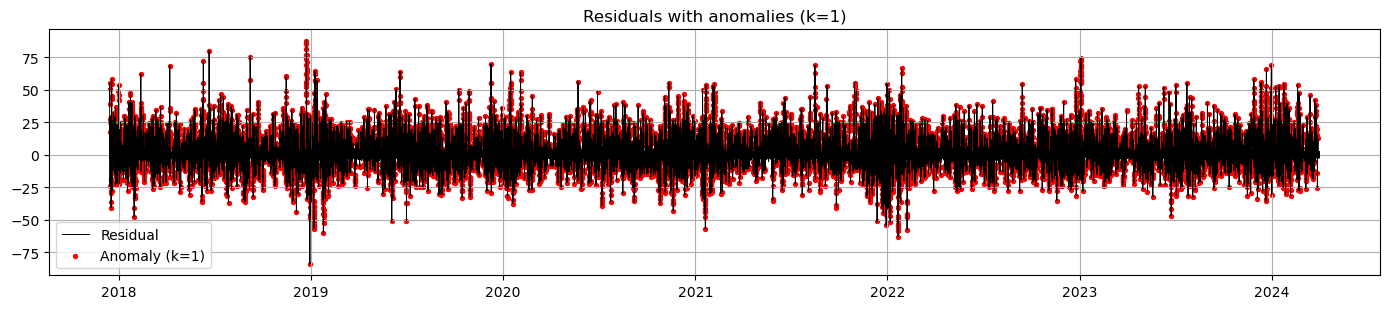

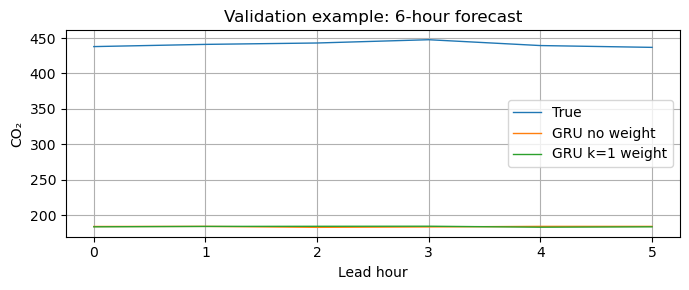

In [24]:
# ================== 实验主线（短期 6h 预测）==================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 0) 准备数据：co2, resid, sample_weight ----------
try:
    _ = df_full['co2']
except Exception as e:
    raise RuntimeError("未找到 df_full['co2']，请先按之前步骤构建 df_full（含 co2 列）。") from e

# 若无 resid，则做 STL(日+周)残差
if 'resid' not in df_full.columns:
    try:
        from statsmodels.tsa.seasonal import STL
    except ImportError:
        raise RuntimeError("需要 statsmodels：pip install statsmodels")
    s = df_full['co2'].astype(float).copy().interpolate(method='time').ffill().bfill()
    stl1 = STL(s, period=24, robust=True).fit()
    stl2 = STL(stl1.resid, period=24*7, robust=True).fit()
    df_full['resid'] = stl2.resid

# IQR(k=1) -> anomaly_flag & sample_weight（若未生成）
if 'sample_weight' not in df_full.columns:
    def seasonal_iqr_flags(series, index, by="dowhour", k=1.0):
        df_tmp = pd.DataFrame({"y": series}, index=index)
        if by == "dowhour":
            grp = df_tmp.groupby([df_tmp.index.dayofweek, df_tmp.index.hour])["y"]
        elif by == "hour":
            grp = df_tmp.groupby(df_tmp.index.hour)["y"]
        else:
            raise ValueError("by must be 'dowhour' or 'hour'")
        q1 = grp.transform(lambda x: x.quantile(0.25))
        q3 = grp.transform(lambda x: x.quantile(0.75))
        iqr = q3 - q1
        lower = q1 - 1.0 * iqr
        upper = q3 + 1.0 * iqr
        return ~df_tmp["y"].between(lower, upper)
    df_full['anomaly_flag'] = seasonal_iqr_flags(df_full['resid'], df_full.index, by="dowhour", k=1.0)
    df_full['sample_weight'] = np.where(df_full['anomaly_flag'], 0.3, 1.0)

series = df_full['co2'].astype(float).values
weights = df_full['sample_weight'].astype(float).values
index   = df_full.index

# ---------- 1) 设置实验参数 ----------
HORIZON  = 6           # 预测 6 小时
LOOKBACK = 24 * 7      # 过去 7 天作为输入
STRIDE   = 3           # 每 3 小时取一个样本
SPLIT    = int(len(series) * 0.8)  # 时间切分：最后 20% 做验证

# ---------- 2) 基线：季节性 naive（7 天同一小时中位数） ----------
def seasonal_profile_forecast(s, flags, t, horizon=HORIZON, days_back=7):
    preds = []
    for h in range(horizon):
        idx = t + h
        vals = []
        for d in range(1, days_back+1):
            j = idx - 24*d
            if j < 0: continue
            if flags is None or (not bool(flags[j])):  # 无权重基线：flags=None
                vals.append(float(s[j]))
        if len(vals) == 0:
            preds.append(float(s[idx-24]) if idx-24>=0 else float(np.nanmedian(s[max(0, idx-24):idx])))
        else:
            preds.append(float(np.median(vals)))
    return np.array(preds, dtype=float)

# 验证集滚动评估（基线）
y = series
end_idx = len(y) - HORIZON
val_start = max(SPLIT, LOOKBACK)
idxs_val = np.arange(val_start, end_idx, STRIDE, dtype=int)

mae_list, rmse_list = [], []
y_plot, yhat_plot   = [], []
for t in idxs_val:
    y_true = y[t:t+HORIZON]
    y_pred = seasonal_profile_forecast(y, flags=None, t=t, horizon=HORIZON, days_back=7)
    err = y_pred - y_true
    mae_list.append(np.mean(np.abs(err)))
    rmse_list.append(np.sqrt(np.mean(err**2)))
    # 收集一条曲线段用于可视化（只取第一条）
    if len(y_plot) == 0:
        y_plot = y_true
        yhat_plot = y_pred

baseline_mae  = float(np.mean(mae_list))
baseline_rmse = float(np.mean(rmse_list))

print("=== Baseline (seasonal naive, 6h) ===")
print(f"MAE : {baseline_mae:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")

# ---------- 3) GRU 训练：无权重 vs 降权 ----------
try:
    import torch
    import torch.nn as nn
    from torch.utils.data import Dataset, DataLoader
except Exception as e:
    raise RuntimeError("需要 PyTorch：pip install torch") from e

class SeqDataset(torch.utils.data.Dataset):
    def __init__(self, y, w, lookback, horizon, start, end, stride, y_mean, y_std):
        self.y = y.astype(np.float32)
        self.w = w.astype(np.float32)
        self.lookback = lookback
        self.horizon  = horizon
        self.idxs = np.arange(max(start, lookback), end - horizon, stride, dtype=int)
        self.y_mean = np.float32(y_mean)
        self.y_std  = np.float32(y_std)
    def __len__(self): return len(self.idxs)
    def __getitem__(self, i):
        t = self.idxs[i]
        x = (self.y[t-self.lookback:t] - self.y_mean) / (self.y_std + 1e-8)
        y = self.y[t:t+self.horizon]
        w = self.w[t:t+self.horizon]
        return torch.from_numpy(x[:, None]), torch.from_numpy(y), torch.from_numpy(w)

class GRUForecast(nn.Module):
    def __init__(self, hidden=64, layers=1, horizon=HORIZON):
        super().__init__()
        self.gru = nn.GRU(1, hidden, num_layers=layers, batch_first=True)
        self.fc  = nn.Linear(hidden, horizon)
    def forward(self, x):
        o,_ = self.gru(x)
        return self.fc(o[:, -1, :])

def weighted_mae(pred, true, weight):
    w = weight / (weight.mean() + 1e-8)   # 归一化，避免不同权重方案量级不同
    return (torch.abs(pred-true) * w).mean()

def eval_loader(model, loader, device):
    model.eval()
    mae_sum = rmse_sum = n = 0
    with torch.no_grad():
        for xb, yb, _ in loader:
            xb, yb = xb.to(device), yb.to(device)
            yhat = model(xb)
            err = yhat - yb
            mae_sum  += torch.mean(torch.abs(err)).item() * xb.size(0)
            rmse_sum += torch.sqrt(torch.mean(err**2)).item() * xb.size(0)
            n += xb.size(0)
    return mae_sum / max(1,n), rmse_sum / max(1,n)

def train_gru(y, w, lookback=LOOKBACK, horizon=HORIZON, stride=STRIDE, epochs=12, batch=64, lr=1e-3, device="cpu"):
    split = SPLIT
    y_mean = np.mean(y[:split]).astype(np.float32)
    y_std  = (np.std(y[:split]) + 1e-8).astype(np.float32)
    ds_tr = SeqDataset(y, w, lookback, horizon, start=0, end=split, stride=stride, y_mean=y_mean, y_std=y_std)
    ds_va = SeqDataset(y, w, lookback, horizon, start=split, end=len(y), stride=stride, y_mean=y_mean, y_std=y_std)
    dl_tr = DataLoader(ds_tr, batch_size=batch, shuffle=True, drop_last=True)
    dl_va = DataLoader(ds_va, batch_size=batch, shuffle=False)

    model = GRUForecast(hidden=64, layers=1, horizon=horizon).to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    best = 1e9; best_state = None
    for ep in range(1, epochs+1):
        model.train()
        for xb, yb, wb in dl_tr:
            xb, yb, wb = xb.to(device), yb.to(device), wb.to(device)
            yhat = model(xb)
            loss = weighted_mae(yhat, yb, wb)
            opt.zero_grad(); loss.backward(); opt.step()
        # 简单早停：保存最佳验证MAE
        val_mae, _ = eval_loader(model, dl_va, device)
        if val_mae < best - 1e-6:
            best = val_mae
            best_state = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}
    if best_state is not None:
        model.load_state_dict(best_state)
    val_mae, val_rmse = eval_loader(model, dl_va, device)
    return model, val_mae, val_rmse, dl_va

# 训练 & 对比
import torch
torch.manual_seed(0); np.random.seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

w_none = np.ones_like(weights, dtype=np.float32)
w_anom = weights.astype(np.float32)

model_none, mae_none, rmse_none, dl_va_none = train_gru(series, w_none, device=device)
model_anom, mae_anom, rmse_anom, dl_va_anom = train_gru(series, w_anom, device=device)

# ---------- 4) 汇总结果 ----------
res_tbl = pd.DataFrame([
    ["SeasonalNaive", baseline_mae,  baseline_rmse],
    ["GRU (no weight)", mae_none,   rmse_none],
    ["GRU (IQR k=1 weight)", mae_anom, rmse_anom],
], columns=["Setting", "Val_MAE", "Val_RMSE"])
print("\n=== Main Results (6h) ===")
print(res_tbl)

# ---------- 5) 可视化：残差+异常；验证集预测一条示例 ----------
# 5.1 残差 + 异常点
plt.figure(figsize=(14, 3.2))
plt.plot(index, df_full['resid'].values, lw=0.7, color='black', label="Residual")
mask = df_full['anomaly_flag'] if 'anomaly_flag' in df_full.columns else (df_full['sample_weight']<1.0)
plt.scatter(index[mask], df_full['resid'][mask], s=8, color='red', label="Anomaly (k=1)")
plt.title("Residuals with anomalies (k=1)"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# 5.2 验证集一条窗口的真值 vs 预测（GRU无权重 & 降权）
# 取验证集中第一批次的第一个样本来画
for xb, yb, wb in dl_va_none:
    xb0 = xb[0:1].to(device)
    y_true = yb[0].cpu().numpy()
    yhat_none = model_none(xb0).detach().cpu().numpy().ravel()
    yhat_anom = model_anom(xb0).detach().cpu().numpy().ravel()
    break

plt.figure(figsize=(7, 3))
plt.plot(range(HORIZON), y_true, lw=1.0, label="True")
plt.plot(range(HORIZON), yhat_none, lw=1.0, label="GRU no weight")
plt.plot(range(HORIZON), yhat_anom, lw=1.0, label="GRU k=1 weight")
plt.title("Validation example: 6-hour forecast")
plt.xlabel("Lead hour"); plt.ylabel("CO₂"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()


In [26]:
# === Residual-learning GRU ===
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# 用你上面定义过的参数/数据
y = series.astype(np.float32)
w = weights.astype(np.float32)
HORIZON, LOOKBACK, STRIDE, SPLIT = 6, 24*7, 3, int(len(y)*0.8)

# 1) 先预生成 “naive 预测” 以构造残差目标
def seasonal_profile_forecast(s, flags, t, horizon=HORIZON, days_back=7):
    preds = []
    for h in range(horizon):
        idx = t + h
        vals = []
        for d in range(1, days_back+1):
            j = idx - 24*d
            if j < 0: continue
            vals.append(float(s[j]))
        if len(vals) == 0:
            preds.append(float(s[idx-24]) if idx-24>=0 else float(np.nanmedian(s[max(0, idx-24):idx])))
        else:
            preds.append(float(np.median(vals)))
    return np.array(preds, dtype=np.float32)

end_idx = len(y) - HORIZON
val_start = max(SPLIT, LOOKBACK)
idxs_tr = np.arange(max(LOOKBACK, 0), SPLIT - HORIZON, STRIDE, dtype=int)
idxs_va = np.arange(val_start, end_idx, STRIDE, dtype=int)

naive_tr = {t: seasonal_profile_forecast(y, None, t, HORIZON, 7) for t in idxs_tr}
naive_va = {t: seasonal_profile_forecast(y, None, t, HORIZON, 7) for t in idxs_va}

# 2) 数据集：目标 = y_true - naive_pred（学残差）
class ResidualDataset(Dataset):
    def __init__(self, y, w, idxs, lookback, horizon, naive_dict, y_mean, y_std):
        self.y, self.w = y, w
        self.idxs = idxs
        self.L, self.H = lookback, horizon
        self.naive = naive_dict
        self.y_mean, self.y_std = y_mean, y_std
    def __len__(self): return len(self.idxs)
    def __getitem__(self, i):
        t = self.idxs[i]
        x = (self.y[t-self.L:t] - self.y_mean) / (self.y_std + 1e-8)
        y_true = self.y[t:t+self.H]
        y_naive = self.naive[t]
        y_resid = y_true - y_naive                         # 目标 = 残差
        w_seq   = self.w[t:t+self.H]
        return torch.from_numpy(x[:,None]), torch.from_numpy(y_resid), torch.from_numpy(w_seq), torch.from_numpy(y_naive)

# 标准化用训练段
y_mean = np.mean(y[:SPLIT]).astype(np.float32)
y_std  = (np.std(y[:SPLIT]) + 1e-8).astype(np.float32)

ds_tr = ResidualDataset(y, w, idxs_tr, LOOKBACK, HORIZON, naive_tr, y_mean, y_std)
ds_va = ResidualDataset(y, w, idxs_va, LOOKBACK, HORIZON, naive_va, y_mean, y_std)
dl_tr = DataLoader(ds_tr, batch_size=64, shuffle=True, drop_last=True)
dl_va = DataLoader(ds_va, batch_size=64, shuffle=False)

# 3) 模型与损失（Huber + 梯度裁剪）
class GRUForecast(nn.Module):
    def __init__(self, hidden=96, layers=2, horizon=HORIZON):
        super().__init__()
        self.gru = nn.GRU(1, hidden, num_layers=layers, batch_first=True)
        self.fc  = nn.Linear(hidden, horizon)
    def forward(self, x):
        o,_ = self.gru(x); return self.fc(o[:,-1,:])

def weighted_huber(pred, true, weight, delta=5.0):
    # pred/true: 残差尺度（通常远小于 400）
    err = pred - true
    abs_err = torch.abs(err)
    quad = torch.clamp(abs_err, max=delta)
    lin  = abs_err - quad
    huber = 0.5*quad**2 + delta*lin
    w = weight / (weight.mean() + 1e-8)
    return (huber * w).mean()

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(0); np.random.seed(0)
model = GRUForecast(hidden=96, layers=2, horizon=HORIZON).to(device)
opt = torch.optim.Adam(model.parameters(), lr=2e-3)

best = 1e9; best_state = None
for ep in range(1, 25):  # 训练更久一些
    model.train()
    for xb, y_res, wb, _ in dl_tr:
        xb, y_res, wb = xb.to(device), y_res.to(device), wb.to(device)
        yhat_res = model(xb)
        loss = weighted_huber(yhat_res, y_res, wb, delta=5.0)
        opt.zero_grad(); loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # 梯度裁剪
        opt.step()
    # 简单早停记录
    model.eval(); val_mae = 0.0; n = 0
    with torch.no_grad():
        for xb, y_res, _, y_naive in dl_va:
            xb = xb.to(device); y_res = y_res.to(device)
            yhat_res = model(xb).cpu().numpy()
            y_naive  = y_naive.numpy()
            y_true   = y_res.cpu().numpy() + y_naive         # 还原到原尺度
            y_pred   = yhat_res + y_naive
            mae = np.mean(np.abs(y_pred - y_true))
            val_mae += mae * xb.size(0); n += xb.size(0)
    val_mae /= max(1, n)
    if val_mae < best - 1e-6:
        best = val_mae
        best_state = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}

# 加载最佳并做最终验证 MAE/RMSE
if best_state is not None:
    model.load_state_dict(best_state)

def eval_final(model, loader):
    model.eval()
    mae_sum = rmse_sum = n = 0
    with torch.no_grad():
        for xb, y_res, _, y_naive in loader:
            xb = xb.to(device)
            yhat_res = model(xb).cpu().numpy()
            y_naive  = y_naive.numpy()
            y_true   = y_res.numpy() + y_naive
            y_pred   = yhat_res + y_naive
            err = y_pred - y_true
            mae_sum  += np.mean(np.abs(err)) * xb.size(0)
            rmse_sum += np.sqrt(np.mean(err**2)) * xb.size(0)
            n += xb.size(0)
    return mae_sum/max(1,n), rmse_sum/max(1,n)

mae_res, rmse_res = eval_final(model, dl_va)

print("\n=== Residual-learning GRU (6h) ===")
print(f"Val_MAE : {mae_res:.4f}")
print(f"Val_RMSE: {rmse_res:.4f}")



=== Residual-learning GRU (6h) ===
Val_MAE : 6.8474
Val_RMSE: 9.3492


In [28]:
# ==== Ablation: residual-GRU with vs without weights (k=1) ====
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# 复用你已有的对象/函数：series, weights(df_full['sample_weight']), HORIZON=6, LOOKBACK=24*7, STRIDE=3, SPLIT=int(len(series)*0.8)
y = series.astype(np.float32)
w_use = weights.astype(np.float32)
w_ones = np.ones_like(w_use, dtype=np.float32)

def seasonal_profile_forecast(s, flags, t, horizon=6, days_back=7):
    preds = []
    for h in range(horizon):
        idx = t + h
        vals = []
        for d in range(1, days_back+1):
            j = idx - 24*d
            if j < 0: continue
            vals.append(float(s[j]))
        preds.append(float(np.median(vals)) if len(vals)>0 else float(s[max(0, idx-24):idx].median()))
    return np.array(preds, dtype=np.float32)

end_idx = len(y) - HORIZON
val_start = max(SPLIT, LOOKBACK)
idxs_tr = np.arange(max(LOOKBACK,0), SPLIT - HORIZON, STRIDE, dtype=int)
idxs_va = np.arange(val_start, end_idx, STRIDE, dtype=int)

naive_tr = {t: seasonal_profile_forecast(y, None, t, HORIZON, 7) for t in idxs_tr}
naive_va = {t: seasonal_profile_forecast(y, None, t, HORIZON, 7) for t in idxs_va}

class ResidualDataset(torch.utils.data.Dataset):
    def __init__(self, y, w, idxs, lookback, horizon, naive_dict, y_mean, y_std):
        self.y, self.w, self.idxs = y, w, idxs
        self.L, self.H = lookback, horizon
        self.naive = naive_dict
        self.y_mean, self.y_std = y_mean, y_std
    def __len__(self): return len(self.idxs)
    def __getitem__(self, i):
        t = self.idxs[i]
        x = (self.y[t-self.L:t] - self.y_mean) / (self.y_std + 1e-8)
        y_true = self.y[t:t+self.H]
        y_naive = self.naive[t]
        y_resid = y_true - y_naive
        w_seq   = self.w[t:t+self.H]
        return torch.from_numpy(x[:,None]), torch.from_numpy(y_resid), torch.from_numpy(w_seq), torch.from_numpy(y_naive)

y_mean = np.mean(y[:SPLIT]).astype(np.float32)
y_std  = (np.std(y[:SPLIT]) + 1e-8).astype(np.float32)

def make_loaders(w_arr):
    ds_tr = ResidualDataset(y, w_arr, idxs_tr, LOOKBACK, HORIZON, naive_tr, y_mean, y_std)
    ds_va = ResidualDataset(y, w_arr, idxs_va, LOOKBACK, HORIZON, naive_va, y_mean, y_std)
    return DataLoader(ds_tr, batch_size=64, shuffle=True, drop_last=True), DataLoader(ds_va, batch_size=64, shuffle=False)

dl_tr_use, dl_va_use = make_loaders(w_use)
dl_tr_ones, dl_va_ones = make_loaders(w_ones)

class GRUForecast(nn.Module):
    def __init__(self, hidden=96, layers=2, horizon=HORIZON):
        super().__init__()
        self.gru = nn.GRU(1, hidden, num_layers=layers, batch_first=True)
        self.fc  = nn.Linear(hidden, horizon)
    def forward(self, x):
        o,_ = self.gru(x); return self.fc(o[:,-1,:])

def weighted_huber(pred, true, weight, delta=5.0):
    err = pred - true
    abs_err = torch.abs(err)
    quad = torch.clamp(abs_err, max=delta); lin = abs_err - quad
    huber = 0.5*quad**2 + delta*lin
    w = weight / (weight.mean() + 1e-8)
    return (huber * w).mean()

def train_and_eval(dl_tr, dl_va, use_weights=True, epochs=25, lr=2e-3, device="cuda" if torch.cuda.is_available() else "cpu"):
    torch.manual_seed(0); np.random.seed(0)
    model = GRUForecast().to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    best = 1e9; best_state = None
    for ep in range(1, epochs+1):
        model.train()
        for xb, y_res, wb, _ in dl_tr:
            xb, y_res, wb = xb.to(device), y_res.to(device), wb.to(device)
            yhat_res = model(xb)
            if use_weights:
                loss = weighted_huber(yhat_res, y_res, wb, delta=5.0)
            else:
                loss = weighted_huber(yhat_res, y_res, torch.ones_like(wb), delta=5.0)
            opt.zero_grad(); loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            opt.step()
        # 记录 best by MAE（原尺度）
        model.eval(); mae_sum = rmse_sum = n = 0
        with torch.no_grad():
            for xb, y_res, _, y_naive in dl_va:
                xb = xb.to(device)
                yhat_res = model(xb).cpu().numpy()
                y_true = y_res.numpy() + y_naive.numpy()
                y_pred = yhat_res + y_naive.numpy()
                err = y_pred - y_true
                mae_sum  += np.mean(np.abs(err)) * xb.size(0)
                rmse_sum += np.sqrt(np.mean(err**2)) * xb.size(0)
                n += xb.size(0)
        val_mae = mae_sum/max(1,n)
        if val_mae < best - 1e-6:
            best = val_mae; best_state = {k: v.detach().cpu().clone() for k,v in model.state_dict().items()}
    if best_state is not None:
        model.load_state_dict(best_state)
    # final eval
    model.eval(); mae_sum = rmse_sum = n = 0
    with torch.no_grad():
        for xb, y_res, _, y_naive in dl_va:
            xb = xb.to(device)
            yhat_res = model(xb).cpu().numpy()
            y_true = y_res.numpy() + y_naive.numpy()
            y_pred = yhat_res + y_naive.numpy()
            err = y_pred - y_true
            mae_sum  += np.mean(np.abs(err)) * xb.size(0)
            rmse_sum += np.sqrt(np.mean(err**2)) * xb.size(0)
            n += xb.size(0)
    return mae_sum/max(1,n), rmse_sum/max(1,n)

mae_w, rmse_w   = train_and_eval(dl_tr_use,  dl_va_use,  use_weights=True)
mae_nw, rmse_nw = train_and_eval(dl_tr_ones, dl_va_ones, use_weights=False)

print("\n=== Ablation: Residual-GRU (6h) with vs without weights ===")
print(f"With weights : MAE={mae_w:.4f}, RMSE={rmse_w:.4f}")
print(f"No  weights : MAE={mae_nw:.4f}, RMSE={rmse_nw:.4f}")
print(f"Relative MAE improvement over SeasonalNaive: "
      f"weights={(9.932543 - mae_w)/9.932543*100:.2f}% | "
      f"no-weights={(9.932543 - mae_nw)/9.932543*100:.2f}%")



=== Ablation: Residual-GRU (6h) with vs without weights ===
With weights : MAE=6.8474, RMSE=9.3492
No  weights : MAE=6.7888, RMSE=9.1925
Relative MAE improvement over SeasonalNaive: weights=31.06% | no-weights=31.65%
